In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import math

In [22]:
customer_data = pd.read_csv("shopping-data.csv")  #reading the csv file

In [23]:
customer_data.head() #visualising the datastructure

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<AxesSubplot:>

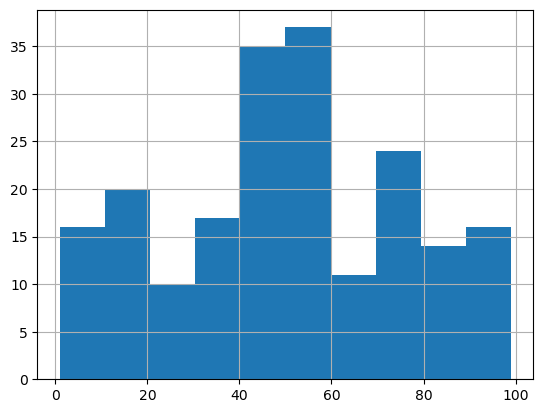

In [26]:
customer_data['Spending Score (1-100)'].hist()  #high concentrated data is on spending score of 40 -60

<AxesSubplot:>

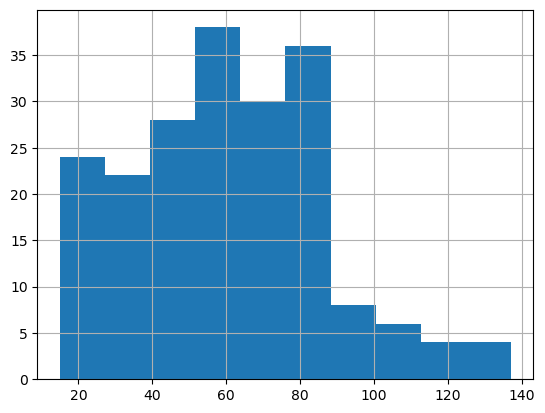

In [29]:
customer_data['Annual Income (k$)'].hist()   # most customers annual income is 50$-60$ per annum

In [28]:
customer_data.describe() #std is high for Annual score and spending score , high variability in the data 

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [31]:
customer_data.info  #we want to check the generes are balanced

<bound method DataFrame.info of      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [37]:
customer_data['Genre'].value_counts(normalize = True) #almost the ratio is balanced no need to collect extra data

Female    0.56
Male      0.44
Name: Genre, dtype: float64

In [39]:
age_intervals = [15,30,45,60,75]
x = customer_data['Age']
customer_data['Age_bins']  = pd.cut(x = x, bins = age_intervals)

customer_data['Age_bins']  #creating an interval for age groups

0      (15, 30]
1      (15, 30]
2      (15, 30]
3      (15, 30]
4      (30, 45]
         ...   
195    (30, 45]
196    (30, 45]
197    (30, 45]
198    (30, 45]
199    (15, 30]
Name: Age_bins, Length: 200, dtype: category
Categories (4, interval[int64, right]): [(15, 30] < (30, 45] < (45, 60] < (60, 75]]

In [40]:
customer_data.groupby('Age_bins')['Age_bins'].count()

Age_bins
(15, 30]    62
(30, 45]    72
(45, 60]    49
(60, 75]    17
Name: Age_bins, dtype: int64

In [41]:
# The _oh means one-hot
customer_data_oh = pd.get_dummies(customer_data)
# Display the one-hot encoded dataframe
customer_data_oh

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male,"Age bins_(15, 30]","Age bins_(30, 45]","Age bins_(45, 60]","Age bins_(60, 75]","Age_bins_(15, 30]","Age_bins_(30, 45]","Age_bins_(45, 60]","Age_bins_(60, 75]"
0,1,19,15,39,0,1,1,0,0,0,1,0,0,0
1,2,21,15,81,0,1,1,0,0,0,1,0,0,0
2,3,20,16,6,1,0,1,0,0,0,1,0,0,0
3,4,23,16,77,1,0,1,0,0,0,1,0,0,0
4,5,31,17,40,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,35,120,79,1,0,0,1,0,0,0,1,0,0
196,197,45,126,28,1,0,0,1,0,0,0,1,0,0
197,198,32,126,74,0,1,0,1,0,0,0,1,0,0
198,199,32,137,18,0,1,0,1,0,0,0,1,0,0


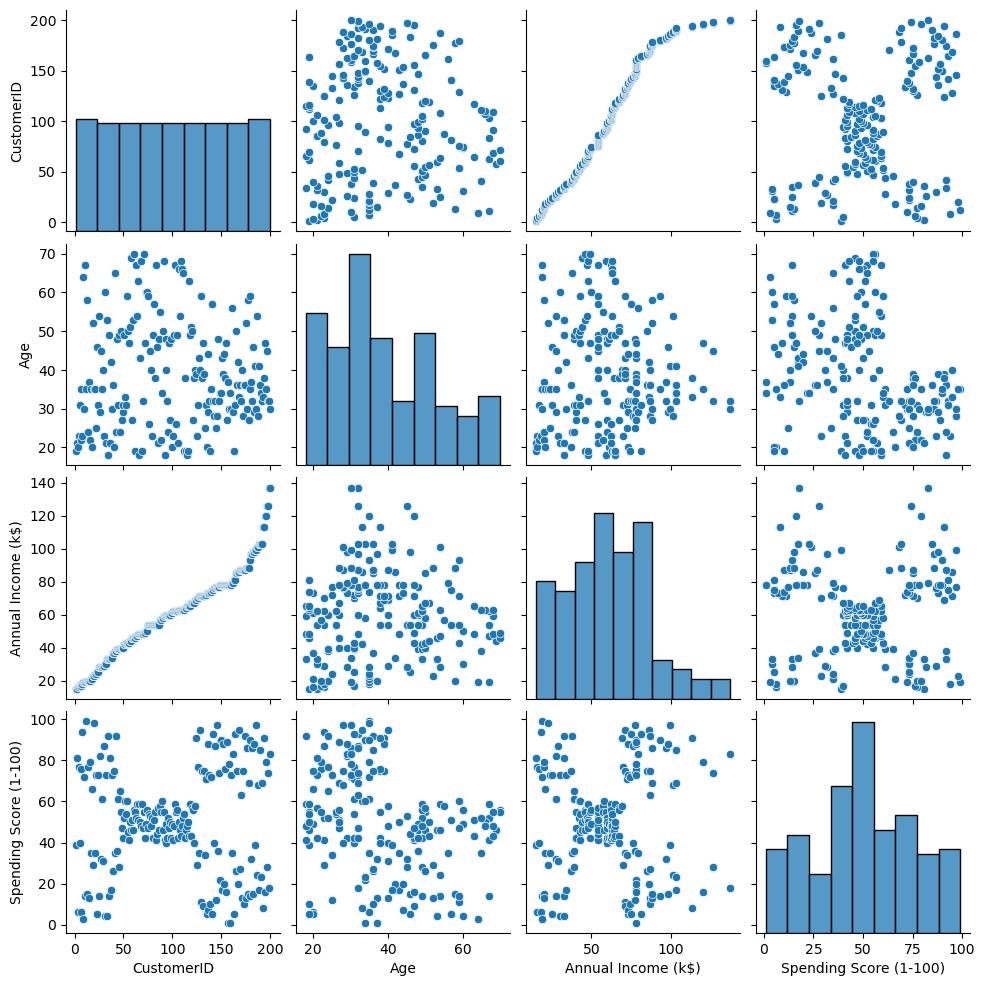

In [42]:
import seaborn as sns
plt.figure()
%matplotlib inline
sns.pairplot(pd.DataFrame(y))   #visualising the correlation with each feature pairs

#from the scatterplot annual income vs spending score graph showing clear clusters

In [43]:
print(customer_data)

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     Age bins  Age_bins  
0    (15, 30]  (15, 30]  
1    (15, 30]  (15, 30]  
2    (15,

In [59]:
#slicing the features
y = customer_data.iloc[:,3:5].values

annual_income = customer_data.iloc[: , 3].values
spend_score  = customer_data.iloc[: , 4].values
Annual_income.shape

(200,)

Text(0, 0.5, 'Spending_Score')

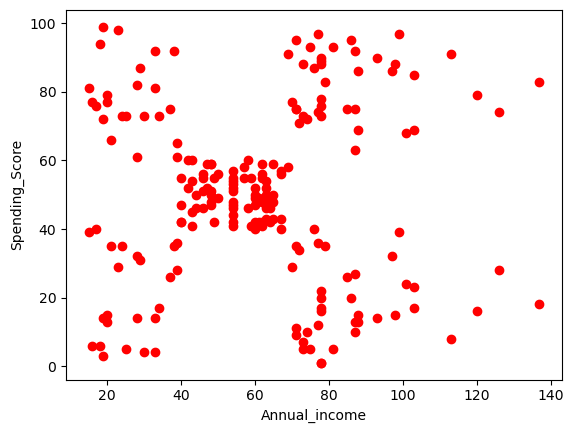

In [48]:
plt.scatter(annual_income,spend_score,c='red')
plt.xlabel('Annual_income')
plt.ylabel('Spending_Score')

In [49]:
import scipy.cluster.hierarchy as sch

In [50]:
from scipy.cluster.hierarchy import dendrogram, linkage

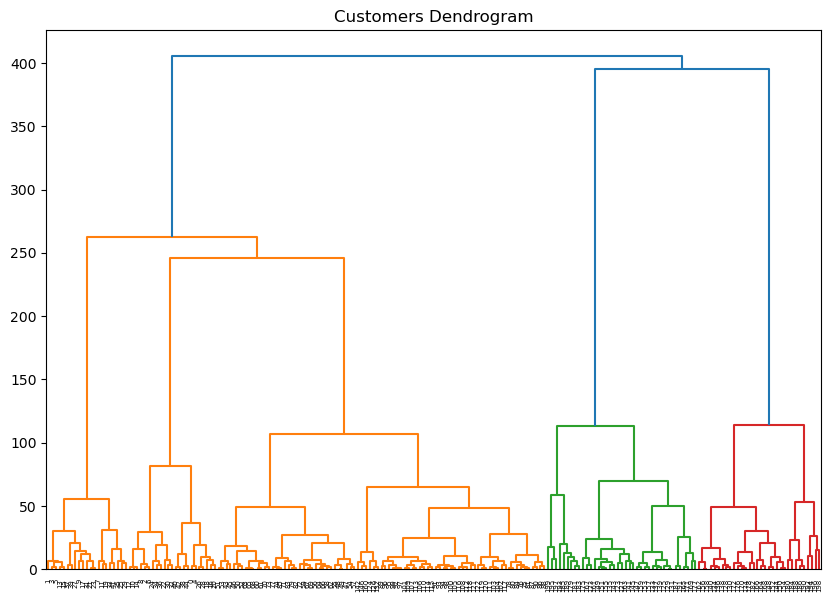

In [60]:
plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")

#based on euclidean distance
clusters = sch.linkage(y, 
            method='ward', 
            metric="euclidean")

#ward - minimises mean squared error between the points in a cluster and its centroid

sch.dendrogram(Z=clusters)
plt.show()

#from the diagram it can be seen there are 5 clusters, the horizotal line cutting longest vertical line will create 5 clusters

In [53]:
from sklearn.cluster import AgglomerativeClustering

In [54]:
k = AgglomerativeClustering(n_clusters =5).fit(y)

In [61]:
labels = k.labels_
print(labels)
print(len(labels))

#200 customers are falling to different categories

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]
200


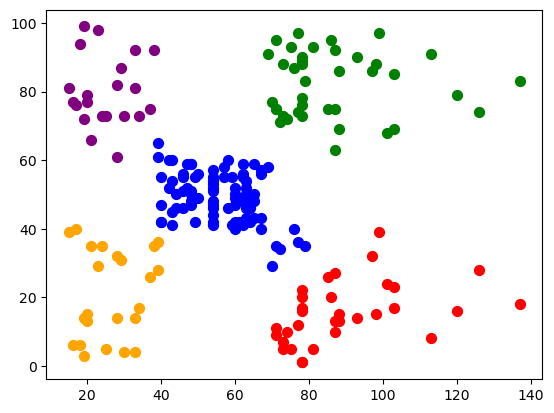

In [62]:
#y[labels == 0 , boolen mask and 0 represent the x coordinate, 1 represent the y coordinate]

plt.scatter(y[labels==0, 0], y[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(y[labels==1, 0], y[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(y[labels==2, 0], y[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(y[labels==3, 0], y[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(y[labels==4, 0], y[labels==4, 1], s=50, marker='o', color='orange')
plt.show()
#there are 5 clusters of customers 